Welcome to Week 5!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.
.

## intro

In [1]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  inflating: root_build/tutorials/gui/gtreeTableTest.C  
  inflating: root_build/tutorials/gui/staffTableTest.C  
  inflating: root_build/tutorials/gui/games.C  
  inflating: root_build/tutorials/gui/guilabels.C  
  inflating: root_build/tutorials/gui/WorldMap.C  
  inflating: 

In [2]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-17 16:50:46--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.81, 185.125.190.39, 91.189.91.83, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  6.47MB/s    in 0.2s    

2024-03-17 16:50:47 (6.47 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121902 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')


<CDLL '/content/root_build/lib//libTreePlayer.so', handle 56b698ae3680 at 0x7ef622f829e0>

Welcome to JupyROOT 6.28/04


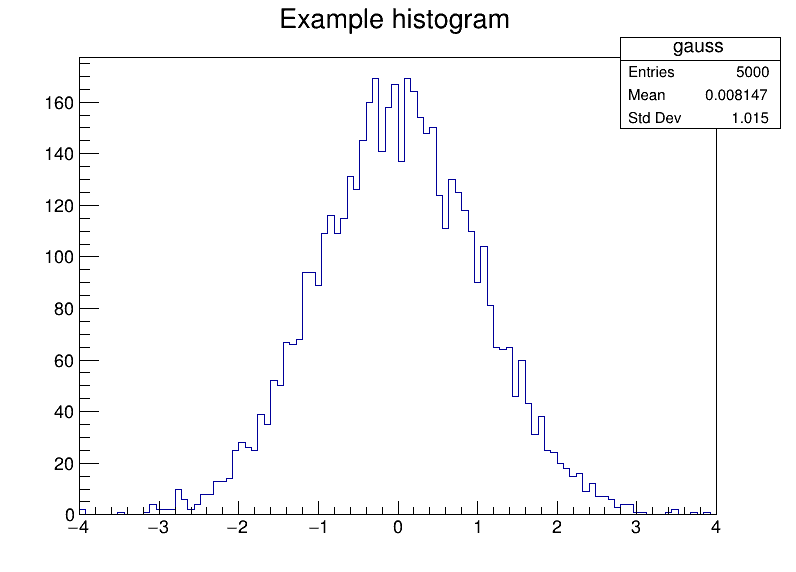

In [4]:
#Now we can check if we have everything working as we expect:
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/17323/files/3634864?module_item_id=644095

Then upload it directly. You can also run the following:

In [5]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-17 16:50:52--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  27.3MB/s    in 24s     

2024-03-17 16:51:16 (26.4 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #0 because H1_PZ cannot accommodate the value 51820.2
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #1 because H1_PX cannot accommodate the value -4985.13
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #2 because H1_PZ cannot accommodate the value 90762.7
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #3 because H1_PY cannot accommodate the value 3413.79
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 4967545 out-of-range events


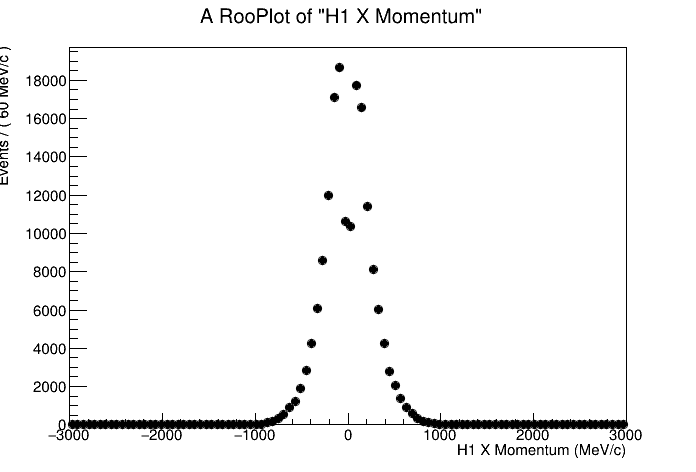

In [6]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/LHCb_Data/B2HHH_MagnetDown.root", "READONLY")
#From our file, we have to extract the DecayTree
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

## Coding from here.

In [7]:
!pip install uproot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.1/348.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 17.6 MB/s eta 0:00:00


In [8]:
# In this section, I created four arrays. The first array contains H1, H2, and H3, while there are separate arrays for each of these components.
# Initially, I thought I needed separate arrays for everything, but later realized that the general array alone would suffice.
# However, by then, changing all the code blocks to accommodate this could leed to unnecessary mistakes so i left it like this.

import uproot, numpy as np
events=uproot.open('/content/LHCb_Data/B2HHH_MagnetDown.root')
tree=events['DecayTree']
Array=tree.arrays([ "H1_ProbK", "H1_ProbPi","H1_isMuon", "H1_PX", "H1_PY", "H1_PZ", "H1_Charge",
                    "H2_ProbK", "H2_ProbPi","H2_isMuon", "H2_PX", "H2_PY", "H2_PZ", "H2_Charge",
                    "H3_ProbK", "H3_ProbPi","H3_isMuon", "H3_PX", "H3_PY", "H3_PZ", "H3_Charge" ])
Array_H1=tree.arrays(["H1_ProbK", "H1_ProbPi","H1_isMuon", "H1_PX", "H1_PY", "H1_PZ", "H1_Charge"])
Array_H2=tree.arrays(["H2_ProbK", "H2_ProbPi","H2_isMuon", "H2_PX", "H2_PY", "H2_PZ", "H2_Charge"])
Array_H3=tree.arrays(["H3_ProbK", "H3_ProbPi","H3_isMuon", "H3_PX", "H3_PY", "H3_PZ", "H3_Charge"])

Calculating the Total Potential of H1, H2 and H3:


In [9]:
#formula: P_tot = sprt(P_x^2 + P_y^2 + P_z^2)
H1_PTOT = ((Array_H1.H1_PX)**2 + (Array_H1.H1_PY)**2 + (Array_H1.H1_PZ)**2)**0.5
H2_PTOT = ((Array_H2.H2_PX)**2 + (Array_H2.H2_PY)**2 + (Array_H2.H2_PZ)**2)**0.5
H3_PTOT = ((Array_H3.H3_PX)**2 + (Array_H3.H3_PY)**2 + (Array_H3.H3_PZ)**2)**0.5

In [10]:
Array_H1["H1_PTOT"] = H1_PTOT
Array_H2["H2_PTOT"] = H2_PTOT
Array_H3["H3_PTOT"] = H3_PTOT

In [11]:
print(Array_H1.H1_PTOT)
print(Array_H2.H2_PTOT)
print(Array_H3.H3_PTOT)

[5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.21e+03]
[1.77e+04, 5.33e+03, 1.79e+04, 2.03e+04, ..., 6.35e+03, 7.74e+03, 2.21e+04]
[1.06e+05, 8.77e+04, 8.56e+04, 1.47e+04, ..., 1.07e+04, 1.14e+05, 1.15e+05]


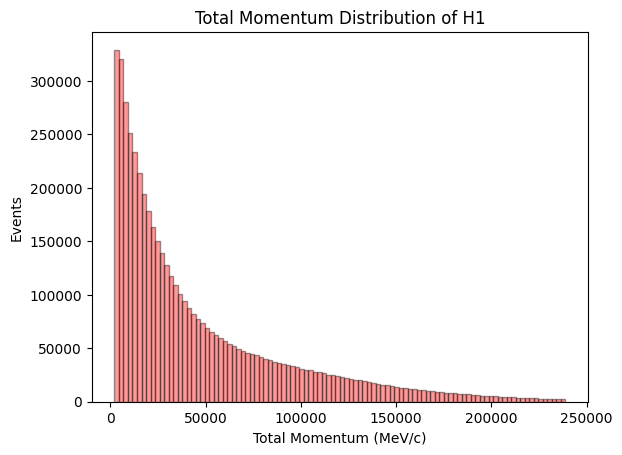

In [12]:
# In the section below, there are three individual graphs that collectively compose the fourth graph.
# Although it would have been possible to omit these separate graphs,
# I chose to display each of them explicitly for clarity and for my own understanding.

import matplotlib.pyplot as plt

#The minimum and maximum values are calculated on the same way for almost every graph.
#This has been done to get a nice x-range
min_value_H1 = np.percentile(H1_PTOT, 1)  # 1st percentile
max_value_H1 = np.percentile(H1_PTOT, 99) # 99th percentile

plt.hist(H1_PTOT, bins=100, range=(min_value_H1, max_value_H1), alpha=0.4, color='red', edgecolor='black')
plt.title('Total Momentum Distribution of H1')
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.show()

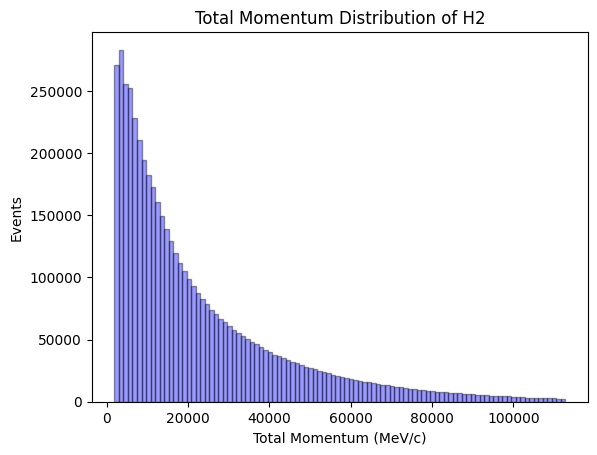

In [13]:
import matplotlib.pyplot as plt

min_value_H2 = np.percentile(H2_PTOT, 1)  # 1st percentile
max_value_H2 = np.percentile(H2_PTOT, 99) # 99th percentile

plt.hist(H2_PTOT, bins=100, range=(min_value_H2, max_value_H2), alpha=0.4, color='blue', edgecolor='black')
plt.title('Total Momentum Distribution of H2')
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.show()

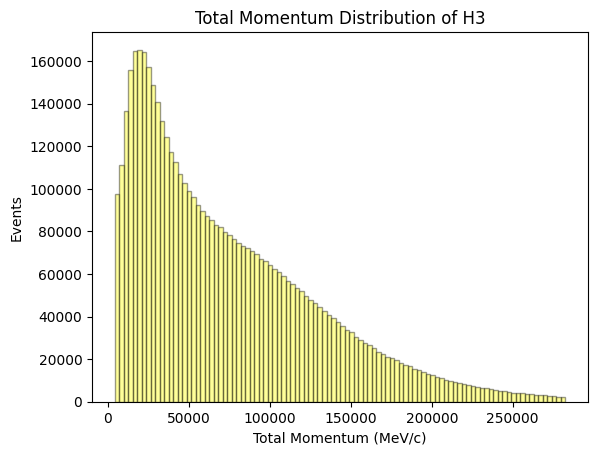

In [14]:
import matplotlib.pyplot as plt

min_value_H3 = np.percentile(H3_PTOT, 1)  # 1st percentile
max_value_H3 = np.percentile(H3_PTOT, 99) # 99th percentile

plt.hist(H3_PTOT, bins=100, range=(min_value_H3, max_value_H3), alpha=0.4, color='yellow', edgecolor='black')
plt.title('Total Momentum Distribution of H3')
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.show()

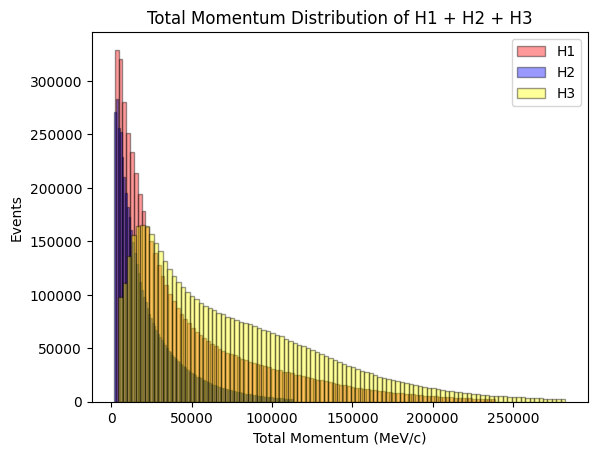

In [15]:
import matplotlib.pyplot as plt

plt.hist(H1_PTOT, bins=100, range=(min_value_H1, max_value_H1), alpha=0.4, color='red', edgecolor='black', label='H1')
plt.hist(H2_PTOT, bins=100, range=(min_value_H2, max_value_H2), alpha=0.4, color='blue', edgecolor='black', label='H2')
plt.hist(H3_PTOT, bins=100, range=(min_value_H3, max_value_H3), alpha=0.4, color='yellow', edgecolor='black', label='H3')

plt.title('Total Momentum Distribution of H1 + H2 + H3')
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.legend()
plt.show()

Now plot the total momentum for the mother (M_Ptot)

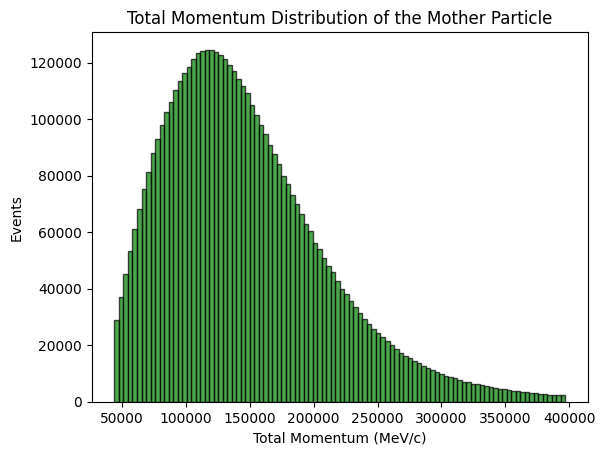

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

# Calculate the total momentum components for the mother particle
M_PX = Array_H1['H1_PX'] + Array_H2['H2_PX'] + Array_H3['H3_PX']
M_PY = Array_H1['H1_PY'] + Array_H2['H2_PY'] + Array_H3['H3_PY']
M_PZ = Array_H1['H1_PZ'] + Array_H2['H2_PZ'] + Array_H3['H3_PZ']

# Calculate the total momentum for the mother particle
M_PTOT = np.sqrt(M_PX**2 + M_PY**2 + M_PZ**2)

min_value_M = np.percentile(M_PTOT, 1)   # 1st percentile
max_value_M = np.percentile(M_PTOT, 99)  # 99th percentile

# Plotting
plt.hist(M_PTOT, bins=100, range=(min_value_M, max_value_M), alpha=0.7, color='green', edgecolor='black')
plt.title('Total Momentum Distribution of the Mother Particle')
plt.xlabel('Total Momentum (MeV/c)')
plt.ylabel('Events')
plt.show()


Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [17]:
# In the labsession I was informed to skip this part so that is why it is commented out.
# tree.Show(45)

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

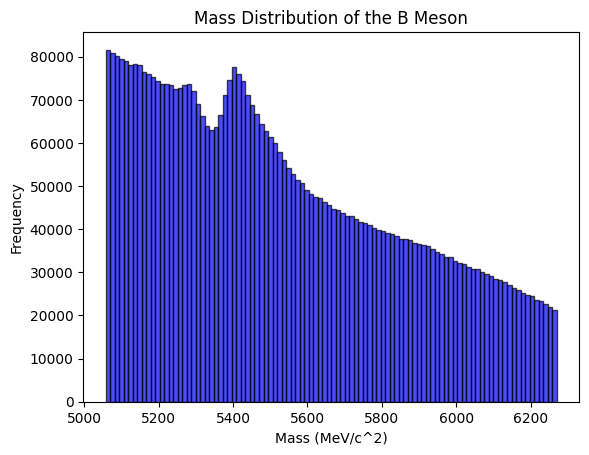

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M_Kaon = 493.677 # MeV/c^2
c = 1 # Speed of light in natural units

# Calculation of energies
H1_E = ((H1_PTOT**2 * c**4 ) + (M_Kaon**2 * c**2))**0.5
H2_E = ((H2_PTOT**2 * c**4 ) + (M_Kaon**2 * c**2))**0.5
H3_E = ((H3_PTOT**2 * c**4 ) + (M_Kaon**2 * c**2))**0.5

# Total energy of the B meson
B_E = H1_E + H2_E + H3_E

# Calculation of the B meson mass
B_Mm = (B_E**2 - (M_PTOT**2 * c**2))**0.5

# Assigning to the array
Array["H1_E"] = H1_E
Array["H2_E"] = H2_E
Array["H3_E"] = H3_E
Array["B_E"]  = B_E
Array["B_Mm"] = B_Mm

min_value_B = np.percentile(Array["B_Mm"], 1)   # 1st percentile
max_value_B = np.percentile(Array["B_Mm"], 99)  # 99th percentile

# Plotting
plt.hist(Array["B_Mm"], bins=100, range=(min_value_B, max_value_B), alpha=0.7, color='blue', edgecolor='black')
plt.title('Mass Distribution of the B Meson')
plt.xlabel('Mass (MeV/c^2)')
plt.ylabel('Frequency')
plt.show()



We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

In [19]:
#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2
import uproot
import matplotlib.pyplot as plt

# Extract the data for plotting
H1_ProbK = tree['H1_ProbK'].array(library='np')
H2_ProbK = tree['H2_ProbK'].array(library='np')
H3_ProbK = tree['H3_ProbK'].array(library='np')

H1_ProbPi = tree['H1_ProbPi'].array(library='np')
H2_ProbPi = tree['H2_ProbPi'].array(library='np')
H3_ProbPi = tree['H3_ProbPi'].array(library='np')

# B_VertexChi2 is a variable in my dataset
B_VertexChi2 = tree['B_VertexChi2'].array(library='np')

# Define x-axis ranges for the histograms
probk_range = (0, 1)   # ProbK values are between 0 and 1
probpi_range = (0, 1)  # ProbPi values are also between 0 and 1
chi2_range = (0, 12)   # The range values were provided to me during the lab session.

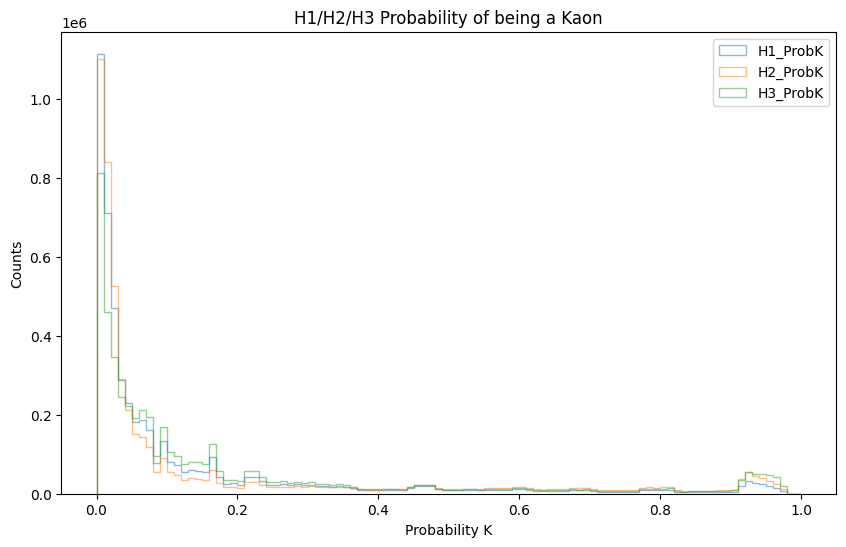

In [20]:
# Plotting H1/H2/H3_ProbK
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbK, bins=100, range=probk_range, alpha=0.5, label='H1_ProbK', histtype='step')
plt.hist(H2_ProbK, bins=100, range=probk_range, alpha=0.5, label='H2_ProbK', histtype='step')
plt.hist(H3_ProbK, bins=100, range=probk_range, alpha=0.5, label='H3_ProbK', histtype='step')
plt.xlabel('Probability K')
plt.ylabel('Counts')
plt.title('H1/H2/H3 Probability of being a Kaon')
plt.legend()
plt.show()

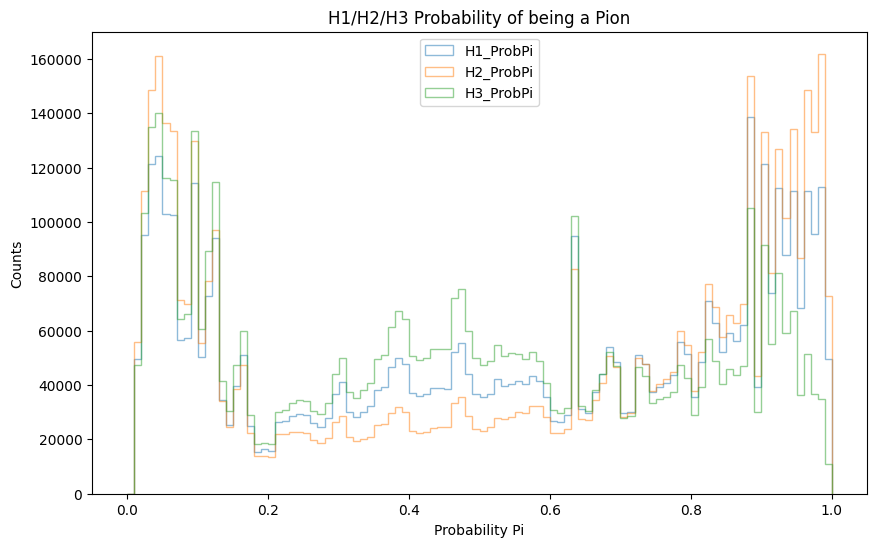

In [21]:
# Plotting H1/H2/H3_ProbPi
plt.figure(figsize=(10, 6))
plt.hist(H1_ProbPi, bins=100, range=probpi_range, alpha=0.5, label='H1_ProbPi',histtype='step')
plt.hist(H2_ProbPi, bins=100, range=probpi_range, alpha=0.5, label='H2_ProbPi',histtype='step')
plt.hist(H3_ProbPi, bins=100, range=probpi_range, alpha=0.5, label='H3_ProbPi',histtype='step')
plt.xlabel('Probability Pi')
plt.ylabel('Counts')
plt.title('H1/H2/H3 Probability of being a Pion')
plt.legend()
plt.show()

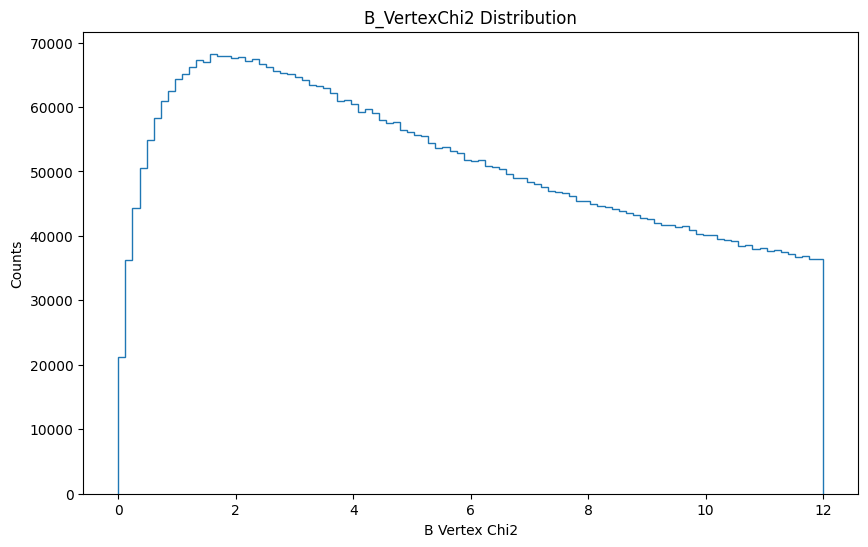

In [22]:
# Plotting B_VertexChi2
plt.figure(figsize=(10, 6))
plt.hist(B_VertexChi2, bins=100, range=chi2_range, histtype='step')
plt.xlabel('B Vertex Chi2')
plt.ylabel('Counts')
plt.title('B_VertexChi2 Distribution')
plt.show()

Using these plots, we can now make a preselection string. This is a text string that looks like

In [23]:
!pip install awkward

38744


<function matplotlib.pyplot.show(close=None, block=None)>

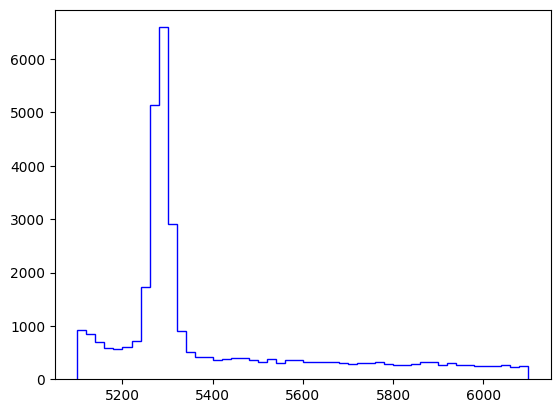

In [24]:
import awkward
selection = np.where((Array_H1.H1_ProbK > Array_H1.H1_ProbPi) & (Array_H2.H2_ProbK > Array_H2.H2_ProbPi) & (Array_H3.H3_ProbK > Array_H3.H3_ProbPi) &
                     (Array_H1.H1_isMuon == 0) & (Array_H2.H2_isMuon == 0) & (Array_H3.H3_isMuon == 0))
cutArray = np.take (Array,selection[0])
print(len(cutArray))
plt.hist(cutArray.B_Mm, bins = 50, range=(5100, 6100), color = 'blue', histtype = 'step')
plt.show

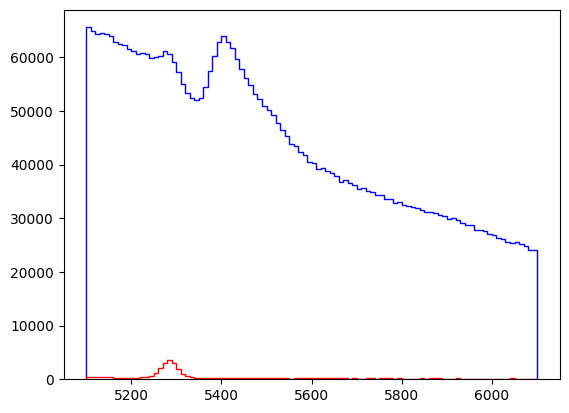

In [25]:
plt.hist(Array.B_Mm, bins=100, range=(5100, 6100), color = 'blue',histtype='step')
plt.hist(cutArray.B_Mm, bins=100, range=(5100,6100), color='red',histtype='step')
plt.show()

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

###Models

In [26]:
!pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.6 MB/s eta 0:00:00


#####Gauss+Exponential

[[Model]]
    (Model(exponential, prefix='exp_') + Model(gaussian, prefix='g1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 199
    # data points      = 100
    # variables        = 5
    chi-square         = 51019.7988
    reduced chi-square = 537.050514
    Akaike info crit   = 633.479886
    Bayesian info crit = 646.505737
    R-squared          = 0.99843483
[[Variables]]
    exp_amplitude:  72445.8830 +/- 22082.3223 (30.48%) (init = 1e+07)
    exp_decay:      925.580206 +/- 47.2953512 (5.11%) (init = 500)
    g1_amplitude:   140478.797 +/- 824.483933 (0.59%) (init = 140000)
    g1_center:      5284.50746 +/- 0.10361163 (0.00%) (init = 5285)
    g1_sigma:       18.0115233 +/- 0.11006385 (0.61%) (init = 19)
    g1_fwhm:        42.4138947 +/- 0.25918057 (0.61%) == '2.3548200*g1_sigma'
    g1_height:      3111.50447 +/- 15.8125901 (0.51%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(exp_

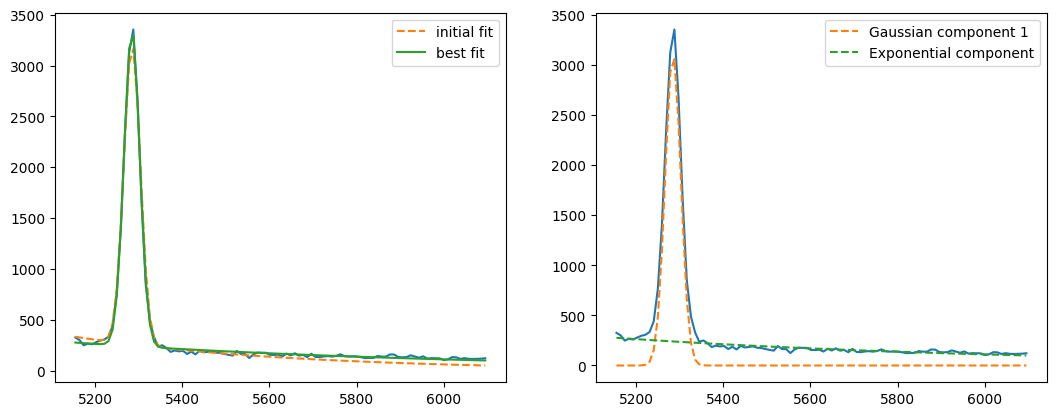

Signal yield: 140478.7974347912 ± 824.4839327247729
Background yield: 72445.88303648873 ± 22082.3223062917
Chi-square: 51019.79880227648
Reduced Chi-square: 537.0505137081734


In [27]:
#Gaussian function
def gauss_function(x, a, x0, sigma):
  return a*np.exp(-(x-x0)**2/(2*sigma**2))

#Exponential function
def exponential_funtion(x, b, c, d):
  return b*np.exp(-c*x)+d

# Combine both functions
def combined_function(x, a, x0, sigma, b, c, d):
  gfr = gauss_function(x, a, x0, sigma)
  efr = exponential_funtion(x, b, c, d)
  return gfr + efr


from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import ExponentialModel, GaussianModel

mod_expon = ExponentialModel(prefix='exp_')
mod_gauss = GaussianModel(prefix='g1_')

model = mod_expon + mod_gauss

params = model.make_params(g1_amplitude = 1.4e5, g1_center=5285, g1_sigma=19, exp_amplitude = 1e7, exp_decay = 500)

bin_contents, bin_edges = np.histogram(cutArray.B_Mm.to_numpy(), bins=100, range=(5150, 6100))
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.0

result = model.fit(bin_contents, params, x=bin_centers)
init = model.eval(params, x=bin_centers)

print(result.fit_report())

x = bin_centers
y = bin_contents

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, result.best_fit, '-', label='best fit')
axes[0].legend()

comps = result.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['g1_'], '--', label='Gaussian component 1')
axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()

# After fitting the model
signal_yield_1 = result.params['g1_amplitude'].value
signal_yield_error_1 = result.params['g1_amplitude'].stderr

background_yield_1 = result.params['exp_amplitude'].value
background_yield_error_1 = result.params['exp_amplitude'].stderr

chi_square_1 = result.chisqr
reduced_chi_square_1 = result.redchi

print(f"Signal yield: {signal_yield_1} ± {signal_yield_error_1}")
print(f"Background yield: {background_yield_1} ± {background_yield_error_1}")
print(f"Chi-square: {chi_square_1}")
print(f"Reduced Chi-square: {reduced_chi_square_1}")


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

#####Crystal Ball + Exponential

[[Model]]
    (Model(crystal_ball, prefix='cb_') + Model(exponential, prefix='exp_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 237
    # data points      = 100
    # variables        = 7
    chi-square         = 51019.7988
    reduced chi-square = 548.599987
    Akaike info crit   = 637.479886
    Bayesian info crit = 655.716078
    R-squared          = 0.99843483
##  Warning: uncertainties could not be estimated:
[[Variables]]
    cb_alpha:      -45.3873483 (init = 3)
    cb_n:           173.227119 (init = 3)
    cb_mean:        5284.50746 (init = 5285)
    cb_sigma:       18.0115256 (init = 19)
    cb_amplitude:   3111.50430 (init = 3150)
    exp_amplitude:  72444.8309 (init = 1e+07)
    exp_decay:      925.582460 (init = 500)


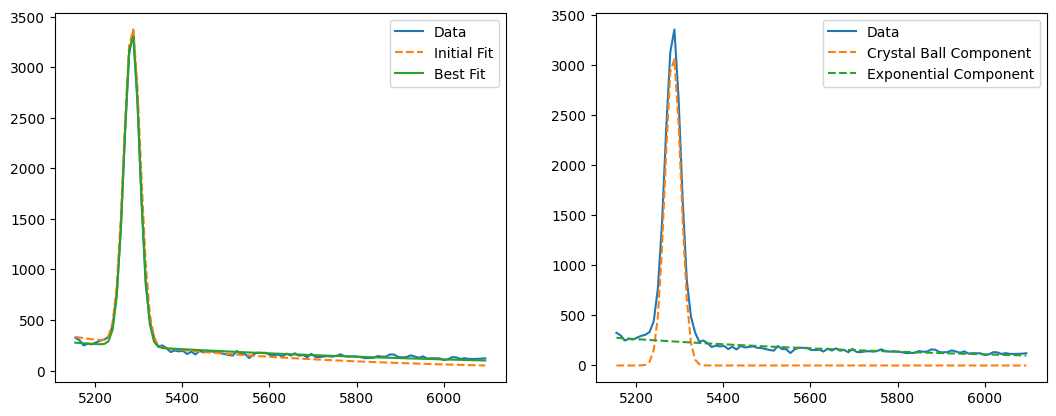

Signal yield: 3111.5042967251356 ± None
Background yield: 72444.83091258838 ± None
Chi-square: 51019.79880184407
Reduced Chi-square: 548.5999871166028


In [28]:
import numpy as np
from lmfit import Model
from lmfit.models import ExponentialModel

#Exponential function
def exponential_funtion(x, b, c, d):
  return b*np.exp(-c*x)+d

def crystal_ball(x, alpha, n, mean, sigma, amplitude):

    x = (x-mean)/sigma
    if sigma < 0:
        raise ValueError("Sigma must be positive")

    if alpha < 0:
        x = -x
        alpha = -alpha

    n = abs(n)
    a = (n/abs(alpha))**n * np.exp(-alpha**2 / 2)
    b = n/abs(alpha) - abs(alpha)

    mask1 = x > -alpha
    mask2 = ~mask1

    cb = np.zeros_like(x)
    cb[mask1] = np.exp(-x[mask1]**2 / 2)
    cb[mask2] = a * (b - x[mask2])**(-n)

    return amplitude * cb

# Combine both functions
def combined_function(x, alpha, n, mean, sigma, amplitude, b, c, d):
  cfr = crystal_ball(x, alpha, n, mean, sigma, amplitude)
  efr = exponential_funtion(x, b, c, d)
  return cfr + efr

# Combine the models with prefixes
cb_model = Model(crystal_ball, prefix='cb_')
exp_model = ExponentialModel(prefix='exp_')

combined_model = cb_model + exp_model

# Example usage with the combined model
params = combined_model.make_params(cb_alpha=3, cb_n=3, cb_mean=5285, cb_sigma=19, cb_amplitude=3.15e3,
                                    exp_amplitude=1e7, exp_decay=500, exp_c=0)

# bin_contents and bin_centers are defined before
result = combined_model.fit(bin_contents, params, x=bin_centers)

# Print the fit report
print(result.fit_report())

# Plotting
x = bin_centers
y = bin_contents

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, label='Data')
axes[0].plot(x, result.init_fit, '--', label='Initial Fit')
axes[0].plot(x, result.best_fit, '-', label='Best Fit')
axes[0].legend()

comps = result.eval_components(x=x)
axes[1].plot(x, y, label='Data')
axes[1].plot(x, comps['cb_'], '--', label='Crystal Ball Component')
axes[1].plot(x, comps['exp_'], '--', label='Exponential Component')
axes[1].legend()

plt.show()

# After fitting the model
signal_yield_2 = result.params['cb_amplitude'].value
signal_yield_error_2 = result.params['cb_amplitude'].stderr

background_yield_2 = result.params['exp_amplitude'].value
background_yield_error_2 = result.params['exp_amplitude'].stderr

chi_square_2 = result.chisqr
reduced_chi_square_2 = result.redchi

print(f"Signal yield: {signal_yield_2} ± {signal_yield_error_2}")
print(f"Background yield: {background_yield_2} ± {background_yield_error_2}")
print(f"Chi-square: {chi_square_2}")
print(f"Reduced Chi-square: {reduced_chi_square_2}")


So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [29]:
import numpy as np

def calculate_asymmetry(H1_Charge, H2_Charge, H3_Charge, signal_yield, background_yield):
    # Sum the charges for each event
    charge_sum = H1_Charge + H2_Charge + H3_Charge

    # Count the number of B+ and B- events based on the sum of charges
    B_plus_count = np.sum(charge_sum == 1)
    B_minus_count = np.sum(charge_sum == -1)

    # Calculate the net signal yields, ensuring they are positive for a physically meaningful asymmetry
    net_signal_yield_plus = max(signal_yield[1] - background_yield[1], 0)
    net_signal_yield_minus = max(signal_yield[0] - background_yield[0], 0)

    # Check if the yields are valid for asymmetry calculation
    if net_signal_yield_plus + net_signal_yield_minus > 0:
        # Calculate the asymmetry using the net signal yields
        A = (net_signal_yield_minus - net_signal_yield_plus) / (net_signal_yield_minus + net_signal_yield_plus)

        # Make sure the asymmetry squared is less than 1 to avoid nan issues
        A_squared = min(A**2, 1)

        # Calculate the uncertainty of the asymmetry
        sigma_A = np.sqrt(1 - A_squared) / np.sqrt(net_signal_yield_minus + net_signal_yield_plus)
    else:
        A = None  # Asymmetry cannot be calculated if yields are not positive
        sigma_A = None

    return A, sigma_A


In [30]:
H1_Charge = Array["H1_Charge"]
H2_Charge = Array["H2_Charge"]
H3_Charge = Array["H3_Charge"]

signal_yield = [signal_yield_1, signal_yield_2]
background_yield = [background_yield_1, background_yield_2]

A, sigma_A = calculate_asymmetry(H1_Charge, H2_Charge, H3_Charge, signal_yield, background_yield)
if A is not None:
    print(f"Asymmetry: {A}, Uncertainty: {sigma_A}")
else:
    print("Asymmetry cannot be calculated due to non-positive yields.")

Asymmetry: 1.0, Uncertainty: 0.0


In [31]:
N_B_minus_1 = signal_yield_1 - background_yield_1
N_B_plus_1 = signal_yield_2 - background_yield_2

N_B_minus_2 = signal_yield_1 + background_yield_1
N_B_plus_2 = signal_yield_2 + background_yield_2

# Asymmetry calculations for both models
A_1 = (N_B_minus_1 - N_B_plus_1) / (N_B_minus_1 + N_B_plus_1)
A_2 = (N_B_minus_2 - N_B_plus_2) / (N_B_minus_2 + N_B_plus_2)

# Uncertainty calculations for both models
sigma_A_1 = np.sqrt(1 - A_1**2) / np.sqrt(N_B_minus_1 + N_B_plus_1)
sigma_A_2 = np.sqrt(1 - A_2**2) / np.sqrt(N_B_minus_2 + N_B_plus_2)

# Print the results
print(f"Asymmetry for model 1: {A_1} ± {sigma_A_1}")
print(f"Asymmetry for model 2: {A_2} ± {sigma_A_2}")

Asymmetry for model 1: -105.63284407757085 ± nan
Asymmetry for model 2: 0.47617811154013967 ± 0.0016372031910462754


<ipython-input-31-40e79331ca38>:14: RuntimeWarning: invalid value encountered in sqrt
  sigma_A_1 = np.sqrt(1 - A_1**2) / np.sqrt(N_B_minus_1 + N_B_plus_1)


#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [32]:
#Define a function to find the invarient mass of two given Kaons

In [33]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [34]:
#Make the revised Dalitz plot here for B+ mesons

In [35]:
#Make the revised Dalitz plot here for B- mesons

In [36]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)